In [1]:
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

from dumb_bots.honestbot import HonestBot
from dumb_bots.randombot import RandomBot
from PokerBotSimple import PokerBotSimple

from pypokerengine.api.game import setup_config, start_poker

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:

def update_bar_chart(winnings, labels, game_num):
    plt.figure(figsize=(8, 8))
    plt.bar(labels, winnings, color='skyblue')

    # Add labels and title
    plt.xlabel('Winnings')
    plt.ylabel('Values')
    plt.title('Winnings After Game: ' + str(game_num))
    plt.show()

In [3]:
saved_model_to_test = "./models/Daniel_Negreanu"
INITIAL_STACK = 100

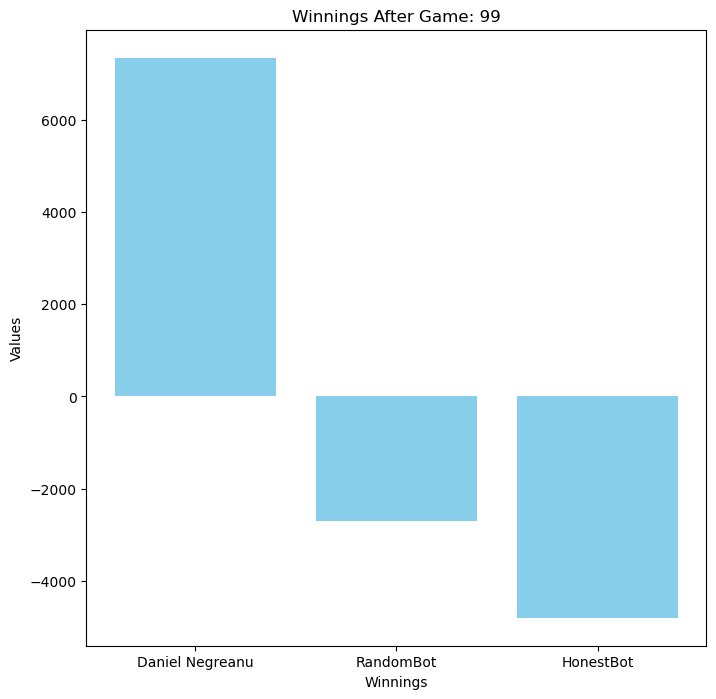

In [4]:
player1 = PokerBotSimple(saved_model=saved_model_to_test, training_mode_on=False)
player2 = RandomBot()
player3 = HonestBot()


dan_wins = 0
random_wins = 0
honest_wins = 0
labels = ['Daniel Negreanu', 'RandomBot', 'HonestBot']
winnings = [0, 0, 0]
for i in range(1, 100):
    config = setup_config(max_round=100, initial_stack=INITIAL_STACK, small_blind_amount=5)
    config.register_player(name="Daniel Negreanu", algorithm=player1)
    config.register_player(name="RandomBot", algorithm=player2)
    config.register_player(name="HonestBot", algorithm=player3)
    game_result = start_poker(config, verbose=0)
    for player_info in game_result["players"]:
        if player_info['name'] == "Daniel Negreanu":
            winnings[0] += (player_info['stack'] - INITIAL_STACK)
        if player_info['name'] == "HonestBot":
            winnings[2] += (player_info['stack'] - INITIAL_STACK)
        if player_info['name'] == "RandomBot":
            winnings[1] += (player_info['stack'] - INITIAL_STACK)
    update_bar_chart(winnings, labels, i)
    time.sleep(0.5)
    clear_output(wait=True)